In [52]:
data[["주야"]] = data[["주야"]].apply(lambda x: pd.factorize(x)[0]) 
data[["요일"]] = data[["요일"]].apply(lambda x: pd.factorize(x)[0]) 
data[["발생지시도"]] = data[["발생지시도"]].apply(lambda x: pd.factorize(x)[0]) 
data[["발생지시군구"]] = data[["발생지시군구"]].apply(lambda x: pd.factorize(x)[0]) 
data[["사고유형_대분류"]] = data[["사고유형_대분류"]].apply(lambda x: pd.factorize(x)[0]) 
data[["사고유형_중분류"]] = data[["사고유형_중분류"]].apply(lambda x: pd.factorize(x)[0]) 
data[["법규위반"]] = data[["법규위반"]].apply(lambda x: pd.factorize(x)[0]) 
data[["도로형태_대분류"]] = data[["도로형태_대분류"]].apply(lambda x: pd.factorize(x)[0]) 
data[["도로형태"]] = data[["도로형태"]].apply(lambda x: pd.factorize(x)[0]) 
data[["당사자종별_1당_대분류"]] = data[["당사자종별_1당_대분류"]].apply(lambda x: pd.factorize(x)[0]) 
data[["당사자종별_2당_대분류"]] = data[["당사자종별_2당_대분류"]].apply(lambda x: pd.factorize(x)[0]) 

In [53]:
data2 = data.drop("발생지시군구", axis = 1)
data2 = data2.drop("사상자수", axis = 1)

In [54]:
data2.shape

(25037, 14)

## 결측치를 부탁해요 간!

우리 귀여운 간 친구가 데이터 결측치를 해결해줄꺼에요

원리는 http://medianetlab.ee.ucla.edu/papers/ICML_GAIN.pdf  
코드 출처는 https://github.com/jsyoon0823/GAIN/blob/master/MNST_Code_Example.py 를 보고 수정함

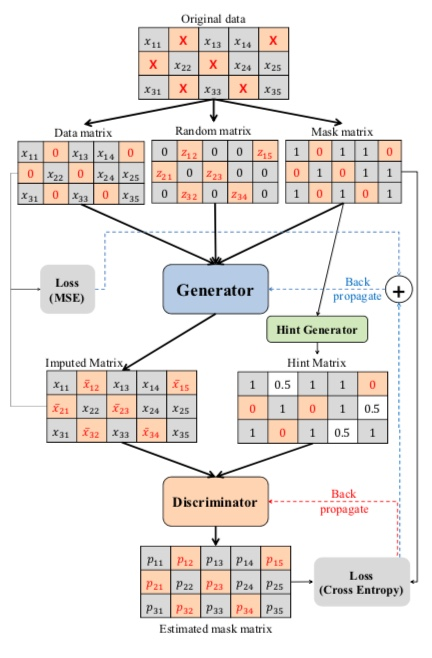

In [2]:
import tensorflow as tf
import numpy as np
import os
from tqdm import tqdm
import math
import random

C:\Users\good\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
batch_size = 128
p_miss = 0.2
p_hint = 0.9
dim = 197
iters = 1

In [49]:
import  pandas as pd
data = pd.read_csv("C:/Users/good/Desktop/train2_kor.csv",engine='python')
m = data.shape[1] - 2
data.shape

(25037, 16)

In [5]:
data

,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류
0,야간,금,1,1,0,0,0,경기,성남시,차대사람,횡단중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자
1,야간,금,1,4,2,1,0,전남,곡성군,차대차,추돌,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차
2,야간,금,1,1,0,0,0,충남,서산시,차대사람,차도통행중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자
3,야간,금,1,1,0,0,0,대구,서구,차대차,측면충돌,안전운전 의무 불이행,교차로,교차로부근,승용차,이륜차
4,주간,금,1,2,1,0,0,서울,영등포구,차대차,측면충돌,중앙선 침범,단일로,교량위,이륜차,화물차
5,주간,금,1,1,0,0,0,광주,서구,차대차,측면충돌,안전거리 미확보,단일로,기타단일로,이륜차,승용차
6,주간,금,1,3,2,0,0,대구,달성군,차대차,측면충돌,과속,교차로,교차로내,승용차,화물차
7,주간,금,1,1,0,0,0,경기,용인시,차대사람,횡단중,신호위반,단일로,기타단일로,화물차,보행자
8,주간,금,1,1,0,0,0,충남,서산시,차대차,측면충돌,안전운전 의무 불이행,단일로,기타단일로,화물차,이륜차
9,야간,금,1,2,0,1,0,전남,광양시,차대차,기타,안전운전 의무 불이행,단일로,기타단일로,화물차,승용차


In [14]:
temp = pd.get_dummies(data["주야"])
temp1 = pd.get_dummies(data["요일"])
temp2 = pd.get_dummies(data["발생지시도"])
temp3 = pd.get_dummies(data["사고유형_대분류"])
temp4 = pd.get_dummies(data["사고유형_중분류"])
temp5 = pd.get_dummies(data["법규위반"])
temp6 = pd.get_dummies(data["도로형태_대분류"])
temp7 = pd.get_dummies(data["도로형태"])
temp8 = pd.get_dummies(data["당사자종별_1당_대분류"])
temp9 = pd.get_dummies(data["당사자종별_2당_대분류"])
temp10 = pd.get_dummies(data["사망자수"])
temp11 = pd.get_dummies(data["중상자수"])
temp12 = pd.get_dummies(data["경상자수"])
temp13 = pd.get_dummies(data["부상신고자수"])
new_data = pd.concat([temp, temp1, temp10, temp11, temp12, temp13, temp2, temp3, temp4, temp5, temp6, temp7, temp8, temp9], axis = 1)

In [15]:
new_data.shape

(25037, 197)

In [34]:
def minimini(x, size, seed = 0):
    np.random.seed(seed)
    m = x.shape[0]
    mini = []
    per = list(np.random.permutation(m))
    shuffle_x = x.iloc[per, :]
    num = math.floor(m/size)
    for k in range(num):
        mini.append(shuffle_x.iloc[k*size:(k+1)*size, : ])
    if m % size != 0:
        mini.append(shuffle_x.iloc[num*size:m, :])
    return mini

In [42]:
def xavier_init(size):
    in_dim = size[0]
    std = 1. / tf.sqrt(in_dim/ 2.)
    return tf.random_normal(shape = size, stddev = std)

X = tf.placeholder(tf.float32, shape = [None, dim])
M = tf.placeholder(tf.float32, shape = [None, dim])
H = tf.placeholder(tf.float32, shape = [None, dim])
Z = tf.placeholder(tf.float32, shape = [None, dim])
#keep_prob=tf.placeholder(tf.float32)

#Discriminator
D_W1 = tf.Variable(xavier_init([dim*2, 256]))
D_B1 = tf.Variable(tf.zeros(shape = [256]))

D_W2 = tf.Variable(xavier_init([256, 256]))
D_B2 = tf.Variable(xavier_init([256]))

D_W3 = tf.Variable(xavier_init([256, 256]))
D_B3 = tf.Variable(xavier_init([256]))

D_W4 = tf.Variable(xavier_init([256, 128]))
D_B4 = tf.Variable(tf.zeros(shape = [128]))

D_W5 = tf.Variable(xavier_init([128, dim]))
D_B5 = tf.Variable(tf.zeros(shape = [dim]))

theta_d = [D_W1, D_W2, D_W3,D_W4, D_W5, D_B1, D_B2, D_B3, D_B4, D_B5]

#Generator
G_W1 = tf.Variable(xavier_init([dim*2, 256]))
G_B1 = tf.Variable(tf.zeros(shape = [256]))

G_W2 = tf.Variable(xavier_init([256, 256]))
G_B2 = tf.Variable(xavier_init([256]))

G_W3 = tf.Variable(xavier_init([256, 256]))
G_B3 = tf.Variable(xavier_init([256]))

G_W4 = tf.Variable(xavier_init([256, 128]))
G_B4 = tf.Variable(tf.zeros(shape = [128]))

G_W5 = tf.Variable(xavier_init([128, dim]))
G_B5 = tf.Variable(tf.zeros(shape = [dim]))

theta_g = [G_W1, G_W2, G_W3,G_W4, G_W5, G_B1, G_B2, G_B3, G_B4, G_B5]

In [43]:
def calc(x, y, z):
    return tf.nn.relu(tf.matmul(x, y) + z)

def generator(x, z, m):
    inp = m*x + (1-m)*z
    inputs = tf.concat(axis = 1, values = [inp, m])
    G_h1 = calc(inputs, G_W1, G_B1)
    G_h2 = calc(G_h1, G_W2, G_B2)
    G_h3 = calc(G_h2, G_W3, G_B3)
    G_h4 = calc(G_h3, G_W4, G_B4)
    G_prob = tf.nn.sigmoid(tf.matmul(G_h4, G_W5) +G_B5)
    #G_prob = tf.nn.dropout(G_prob, keep_prob)
    return G_prob 
    
def discriminator(x, m, g, h):
    inp = m*x + (1-m)*g
    inputs = tf.concat(axis = 1, values = [inp, h])
    D_h1 = calc(inputs, D_W1, D_B1)
    D_h2 = calc(D_h1, D_W2, D_B2)
    D_h3 = calc(D_h2, D_W3, D_B3)
    D_h4 = calc(D_h3, D_W4, D_B4)
    D_prob = tf.nn.sigmoid(tf.matmul(D_h4, D_W5) + G_B5)
    #D_prob = tf.nn.dropout(D_prob, keep_prob)
    return D_prob

def sample_z(m, n):
    return np.random.uniform(0., 1., size = [m, n])

def sample_m(m, n, p):
    a = np.random.uniform(0., 1., size = [m, n])
    b = a > p
    c = 1. * b
    return c

In [44]:
G_sample= generator(X, Z, M)
D_prob = discriminator(X, M, G_sample, H)

#MSE_train_loss = -tf.reduce_mean((M*X != M*G_sample) * tf.log(M*g_sample))
MSE_test_loss = tf.reduce_mean(((1-M)*X- (1-M)*G_sample)**2)/tf.reduce_mean(1-M)
MSE_train_loss = tf.reduce_mean((M*X- M*G_sample)**2 )/tf.reduce_mean(M)
D_loss1 = -tf.reduce_mean(M* tf.log(D_prob + 1e-8) + (1-M)* tf.log(1. - D_prob  + 1e-8)) * 2
G_loss1 = -tf.reduce_mean((1-M)*tf.log(D_prob+ 1e-8))/ tf.reduce_mean((1-M)) 

D_loss = D_loss1
G_loss = G_loss1 +  10 * MSE_train_loss

D_solver = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(D_loss, var_list = theta_d)
G_solver = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(G_loss, var_list = theta_g)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [45]:
for i in range(100):
    avg_cost = 0
    a = minimini(new_data, batch_size, seed = i)
    gr = list(np.random.permutation(math.floor(new_data.shape[0]/batch_size)))
    for it in range(math.floor(data2.shape[0]/batch_size)):
        X_batch = a[gr[it]]
        Z_batch = sample_z(batch_size, dim)
        M_batch = sample_m(batch_size, dim, p_miss)
        H_batch1 = sample_m(batch_size, dim, 1-p_hint)
        H_batch = np.ceil(M_batch * H_batch1)
        NewX_batch = np.ceil(M_batch) * X_batch + np.ceil(1-M_batch) * Z_batch 
        _, D_loss_curr = sess.run([D_solver, D_loss1], feed_dict = {X: X_batch, M: M_batch, Z: NewX_batch, H: H_batch})#, keep_prob : 0.8})
        _, G_loss_curr, MSE_train_loss_curr, MSE_test_loss_curr = sess.run([G_solver, G_loss1, MSE_train_loss, MSE_test_loss], feed_dict = {X: X_batch, M: M_batch, Z: NewX_batch, H: H_batch})#, keep_prob:0.8})
        avg_cost += MSE_train_loss_curr/math.floor(data2.shape[0]/batch_size)
    print('Iter: {}'.format(i))
    print('Train_loss: {:.4}'.format(avg_cost))
    print("Test_loss: {:.4}".format(MSE_test_loss_curr))

Iter: 0
Train_loss: 0.0425
Test_loss: 0.03169
Iter: 1
Train_loss: 0.01903
Test_loss: 0.03075
Iter: 2
Train_loss: 0.01275
Test_loss: 0.03294
Iter: 3
Train_loss: 0.01022
Test_loss: 0.03797
Iter: 4
Train_loss: 0.009222
Test_loss: 0.03873
Iter: 5
Train_loss: 0.008688
Test_loss: 0.03727
Iter: 6
Train_loss: 0.008285
Test_loss: 0.03893
Iter: 7
Train_loss: 0.007976
Test_loss: 0.03679
Iter: 8
Train_loss: 0.007836
Test_loss: 0.03849
Iter: 9
Train_loss: 0.007718
Test_loss: 0.0385
Iter: 10
Train_loss: 0.007623
Test_loss: 0.03774
Iter: 11
Train_loss: 0.007587
Test_loss: 0.03951
Iter: 12
Train_loss: 0.00746
Test_loss: 0.03511
Iter: 13
Train_loss: 0.007486
Test_loss: 0.04072
Iter: 14
Train_loss: 0.007427
Test_loss: 0.03696
Iter: 15
Train_loss: 0.007402
Test_loss: 0.04382
Iter: 16
Train_loss: 0.007399
Test_loss: 0.04701
Iter: 17
Train_loss: 0.007415
Test_loss: 0.04761
Iter: 18
Train_loss: 0.007446
Test_loss: 0.04693
Iter: 19
Train_loss: 0.007485
Test_loss: 0.04866
Iter: 20
Train_loss: 0.007776
Test_lo

In [46]:
c=sess.run(M*G_sample,  feed_dict = {X: X_batch, M: M_batch, Z: NewX_batch, H: H_batch, keep_prob : 0.8})

In [47]:
pd.DataFrame(NewX_batch)

,0,1,0,1,2,3,4,5,6,1,...,4,5,6,7,8,9,10,11,12,13
14454,1.000000,0.000000,0.000000,0.000000,0.000000,0.489972,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.260968,0.000000,0.000000,0.000000,0.000000,0.000000
19047,1.000000,0.000000,0.000000,0.000000,0.388122,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.352664,0.459717,0.000000,0.000000,0.000000,0.000000,0.000000
21101,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.573446,0.000000,1.000000,1.000000,...,1.000000,0.009045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.589229
4222,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.896542,0.000000,0.000000,1.000000,...,1.000000,0.164904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5572,1.000000,0.000000,0.000000,0.404492,0.706545,0.955346,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.980592,0.078874,0.170836,0.824016
23811,1.000000,0.000000,0.062216,0.905606,0.000000,0.000000,0.472976,0.975557,0.181731,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.499996,0.000000,0.000000,0.543058,0.000000,1.000000
15509,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.090218,0.000000,1.000000,...,0.000000,0.257228,0.000000,0.013702,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8844,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.788359,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11028,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.351970,...,0.000000,0.668729,0.000000,0.000000,0.000000,0.546630,0.866891,0.778726,0.997951,0.000000
12014,0.000000,1.000000,0.000000,0.866437,0.000000,0.930236,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.813838,0.000000,0.321144,0.000000,0.000000,0.000000


In [61]:
a=pd.DataFrame(c)

In [62]:
pd.concat([a.iloc[1,:], new_data.iloc[20590,:]], axis = 1)

ValueError: cannot reindex from a duplicate axis

In [51]:
new_data

,0,1,0,1,2,3,4,5,6,1,...,4,5,6,7,8,9,10,11,12,13
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [48]:
a = pd.DataFrame(np.array([[1,2], [3,4]]))

In [49]:
b = pd.DataFrame(np.array([[1,3],[2,4]]))

In [51]:
(a!=b) * 0.7

1